In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import os

In [11]:
#network and training parameters:
EPOCHS = 100 #how many iterations we run the training set
BATCH_SIZE = 128
VERBOSE = 1 #no idea what this is but lets see...
NB_CLASSES = 10 #10 digits
N_HIDDEN = 1000 #number of nodes in hidden layer
VAL_SPLIT = 0.2  #how much of sample is reserved for validation


In [ ]:
#first we need to accumulate the data... we start off with a small NN... 2000 samples of global view? 500 from each?
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]
pl_entry=os.scandir('data_red/global')
fps_entry=os.scandir('fps_red/global')
npl_entry=os.scandir('nonpl_data_red2/global')
nfps_entry=os.scandir('nonpl_fps_red2/global')
np.random.seed(122334)

pl_entry=list(pl_entry)
fps_entry=list(fps_entry)
npl_entry=list(npl_entry)
nfps_entry=list(nfps_entry)

np.random.shuffle(pl_entry)
np.random.shuffle(fps_entry)
np.random.shuffle(npl_entry)
np.random.shuffle(nfps_entry)

tot=2100
bp=1900

i=0
for el in list(pl_entry):
    df=pd.read_csv('data_red/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(i>=bp):
        X_test.append(np.array(df['flux'].iloc[0:2000]))
        Y_test.append([1,0,0])
    else:
        X_train.append(np.array(df['flux'].iloc[0:2000]))
        Y_train.append([1,0,0])
    i=i+1
    if(i==tot): break

j=0
for el in list(fps_entry):
    df=pd.read_csv('fps_red/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(j>=bp):
        X_test.append(np.array(df['flux'].iloc[:2000],dtype='float32'))
        Y_test.append([0,1,0])
    else:
        X_train.append(np.array(df['flux'].iloc[:2000]))
        Y_train.append([0,1,0])
    j=j+1
    if(j==tot): break 

k=0
for el in list(npl_entry):
    df=pd.read_csv('nonpl_data_red2/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(k>=bp/2):
        X_test.append(np.array(df['flux'].iloc[0:2000]))
        Y_test.append([0,0,1])
    else:
        X_train.append(np.array(df['flux'].iloc[0:2000]))
        Y_train.append([0,0,1])
    k=k+1 
    if(k==tot/2): break

l=0
for el in list(nfps_entry):
    df=pd.read_csv('nonpl_fps_red2/global/'+el.name,sep=" ")
    if(len(df['flux'])<2000): continue
    if(l>=bp/2):
       X_test.append(np.array(df['flux'].iloc[:2000]))
       Y_test.append([0,0,1])
    else:
        X_train.append(np.array(df['flux'].iloc[:2000]))
        Y_train.append([0,0,1])
    l=l+1
    if(l==tot/2): break

print(np.array(X_train).shape,np.array(Y_train).shape)
print(np.array(X_test).shape,np.array(Y_test).shape)
np.savetxt('Xtrain.csv', np.array(X_train), delimiter=',')
np.savetxt('Ytrain.csv', np.array(Y_train), delimiter=',')
np.savetxt('Xtest.csv', np.array(X_test), delimiter=',')
np.savetxt('Ytest.csv', np.array(Y_test), delimiter=',')

In [12]:
#first we need to accumulate the data... we start off with a small NN... 2000 samples of global view? 500 from each?
X_train_l=[]
X_test_l=[]
Y_train=[]
Y_test=[]
X_train_g=[]
X_test_g=[]
pl_entry=os.scandir('data_red/local')
fps_entry=os.scandir('fps_red/local')
npl_entry=os.scandir('nonpl_data_red2/local')
nfps_entry=os.scandir('nonpl_fps_red2/local')
np.random.seed(122334)

pl_entry=list(pl_entry)
fps_entry=list(fps_entry)
npl_entry=list(npl_entry)
nfps_entry=list(nfps_entry)

np.random.shuffle(pl_entry)
np.random.shuffle(fps_entry)
np.random.shuffle(npl_entry)
np.random.shuffle(nfps_entry)

tot=1500
bp=1400

i=0
for el in list(pl_entry):
    dfl=pd.read_csv('data_red/local/'+el.name,sep=" ")
    dfg=pd.read_csv('data_red/global/'+el.name[:11]+'_g',sep=" ")
    if(len(dfl['flux'])<200): continue
    if(i>=bp):
        X_test_l.append(np.array(dfl['flux'].iloc[0:200]))
        X_test_g.append(np.array(dfg['flux'].iloc[0:2000]))
        Y_test.append([1,0,0])
    else:
        X_train_l.append(np.array(dfl['flux'].iloc[0:200]))
        X_train_g.append(np.array(dfg['flux'].iloc[0:2000]))
        Y_train.append([1,0,0])
    i=i+1
    if(i==tot): break

j=0
for el in list(fps_entry):
    dfl=pd.read_csv('fps_red/local/'+el.name,sep=" ")
    dfg=pd.read_csv('fps_red/global/'+el.name[:11]+'_g',sep=" ")
    if(len(dfl['flux'])<200): continue
    if(j>=bp):
        X_test_l.append(np.array(dfl['flux'].iloc[:200],dtype='float32'))
        X_test_g.append(np.array(dfg['flux'].iloc[:2000],dtype='float32'))
        Y_test.append([0,1,0])
    else:
        X_train_l.append(np.array(dfl['flux'].iloc[:200]))
        X_train_g.append(np.array(dfg['flux'].iloc[:2000]))
        Y_train.append([0,1,0])
    j=j+1
    if(j==tot): break 

k=0
for el in list(npl_entry):
    dfl=pd.read_csv('nonpl_data_red2/local/'+el.name,sep=" ")
    dfg=pd.read_csv('nonpl_data_red2/global/'+el.name[:11],sep=" ")
    if(len(dfl['flux'])<200): continue
    if(k>=bp/2):
        X_test_l.append(np.array(dfl['flux'].iloc[0:200]))
        X_test_g.append(np.array(dfg['flux'].iloc[0:2000]))
        Y_test.append([0,0,1])
    else:
        X_train_l.append(np.array(dfl['flux'].iloc[0:200]))
        X_train_g.append(np.array(dfg['flux'].iloc[0:2000]))
        Y_train.append([0,0,1])
    k=k+1 
    if(k==tot/2): break

l=0
for el in list(nfps_entry):
    dfl=pd.read_csv('nonpl_fps_red2/local/'+el.name,sep=" ")
    dfg=pd.read_csv('nonpl_fps_red2/global/'+el.name[:11],sep=" ")
    if(len(df['flux'])<200): continue
    if(l>=bp/2):
       X_test_l.append(np.array(dfl['flux'].iloc[:200]))
       X_test_g.append(np.array(dfg['flux'].iloc[:2000]))
       Y_test.append([0,0,1])
    else:
        X_train_l.append(np.array(dfl['flux'].iloc[:200]))
        X_train_g.append(np.array(dfg['flux'].iloc[:2000]))
        Y_train.append([0,0,1])
    l=l+1
    if(l==tot/2): break

print(np.array(X_train_l).shape,np.array(X_train_g).shape,np.array(Y_train).shape)
print(np.array(X_test_l).shape,np.array(X_test_g).shape,np.array(Y_test).shape)
np.savetxt('Xtrain2g.csv', np.array(X_train_g), delimiter=',')
np.savetxt('Xtrain2l.csv', np


.array(X_train_l), delimiter=',')
np.savetxt('Ytrain2.csv', np.array(Y_train), delimiter=',')
np.savetxt('Xtest2g.csv', np.array(X_test_g), delimiter=',')
np.savetxt('Xtest2l.csv', np.array(X_test_l), delimiter=',')
np.savetxt('Ytest2.csv', np.array(Y_test), delimiter=',')

(4200, 200) (4200, 2000) (4200, 3)
(300, 200) (300, 2000) (300, 3)


In [12]:
X_train=np.loadtxt('Xtrain2g.csv',delimiter=',')
Y_train=np.loadtxt('Ytrain2.csv',delimiter=',')
X_test=np.loadtxt('Xtest2g.csv',delimiter=',')
Y_test=np.loadtxt('Ytest2.csv',delimiter=',')

print(len(X_train),len(Y_train),len(X_test),len(Y_test))

4200 4200 300 300


In [14]:
#got the training set ... now write the neural net
#buid the model
#SGD stochastic gradient descent... 
model = tf.keras.models.Sequential()
DROPOUT=0.3
IP=4200

arr=np.arange(0,IP,1)

np.random.shuffle(arr)
X_train=[X_train[i] for i in arr]
Y_train=[Y_train[i] for i in arr]

arr=np.arange(0,300,1)
np.random.shuffle(arr)
X_test=[X_test[i] for i in arr]
Y_test=[Y_test[i] for i in arr]
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

#add hidden layers
model.add(keras.layers.Dense(512,input_shape=(2000,),name='dense_layer',activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(128,input_shape=(512,),name='dense_layer_2',activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(64,input_shape=(128,),name='dense_layer_3',activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(3,input_shape=(64,),name='dense_layer_4',activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

4200 4200 300 300
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 512)               1024512   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               65664     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_4 (Dense)        (None, 

In [15]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(np.array(X_train),np.array(Y_train), batch_size=64, epochs=50, verbose=VERBOSE, validation_split=VAL_SPLIT, callbacks=[es_callback])

Epoch 1/50
53/53 [==============================] - 2s 17ms/step - loss: 1.0529 - accuracy: 0.4060 - val_loss: 1.0182 - val_accuracy: 0.5869
Epoch 2/50
53/53 [==============================] - 1s 14ms/step - loss: 1.0136 - accuracy: 0.4435 - val_loss: 0.9955 - val_accuracy: 0.4048
Epoch 3/50
53/53 [==============================] - 1s 15ms/step - loss: 0.9726 - accuracy: 0.5164 - val_loss: 0.9493 - val_accuracy: 0.6750
Epoch 4/50
53/53 [==============================] - 1s 14ms/step - loss: 0.8956 - accuracy: 0.5961 - val_loss: 0.8564 - val_accuracy: 0.5798
Epoch 5/50
53/53 [==============================] - 1s 16ms/step - loss: 0.8419 - accuracy: 0.5857 - val_loss: 0.8086 - val_accuracy: 0.5929
Epoch 6/50
53/53 [==============================] - 1s 14ms/step - loss: 0.7376 - accuracy: 0.6586 - val_loss: 0.7065 - val_accuracy: 0.6440
Epoch 7/50
53/53 [==============================] - 1s 14ms/step - loss: 0.6790 - accuracy: 0.6714 - val_loss: 0.6847 - val_accuracy: 0.6548
Epoch 8/50
53

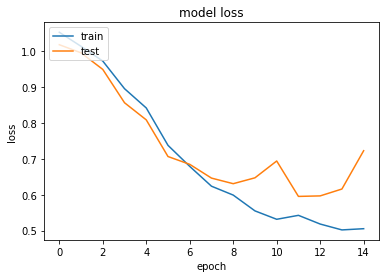

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

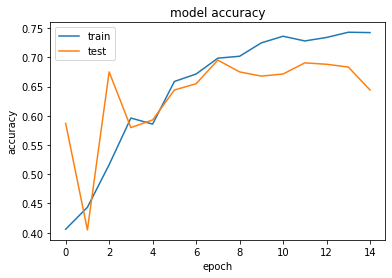

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test))
print('Test accuracy:', test_acc)
Ypred_raw=model.predict(np.array(X_test))
Ypred=np.argmax(Ypred_raw, axis=1)
Ytest_new=np.argmax(Y_test,axis=1)
cm = confusion_matrix(Ytest_new, Ypred)
print(cm)

10/10 [==============================] - 0s 3ms/step - loss: 0.7407 - accuracy: 0.6833
Test accuracy: 0.6833333373069763
[[96  4  0]
 [71 28  1]
 [19  0 81]]
